# Chapter 27: Grace Notes

Grace notes present particular problems for almost all computer representations of scores. They **take up no time, but take up time, at the same time**.

In [2]:
from music21 import *

## Basic Graces

We’ll begin by creating a 4/4 measure of four quarter notes

In [3]:
m = stream.Measure()
m.append(meter.TimeSignature('4/4'))
m.repeatAppend(note.Note('C5'), 4)
m.show('xml')

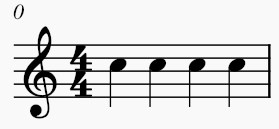

Now let’s insert a D-grace note just before the third quarter note

In [4]:
# First we create a normal note
d = note.Note('D5', type='eighth')

# then create a new grace note with the getGrace method
dGrace = d.getGrace()
m.insert(2.0, dGrace)
m.show('xml')

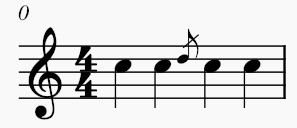

If we look at *dGrace* at first it appears to be just a normal Note

In [5]:
dGrace

<music21.note.Note D>

But its *duration* is an “unlinked” duration which does not say how long it lasts

In [6]:
dGrace.duration

<music21.duration.GraceDuration unlinked type:eighth quarterLength:0.0>

Normally grace notes are slurred to the following note

In [7]:
thirdNote = m.notes[-2]
sl = spanner.Slur(dGrace, thirdNote)
m.insert(0, sl)
m.show('xml')

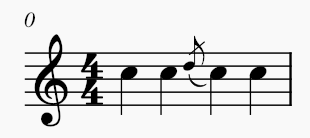

## Multiple Grace Notes

Multiple grace notes are normally beamed together and generally written as **sixteenth** or thirty-second notes

In [8]:
# add two graces to the last C in the measure
eGrace = note.Note('E5', type='16th').getGrace()
dGrace2 = note.Note('D5', type='16th').getGrace()
eGrace.beams.fill(2, 'start')
dGrace2.beams.fill(2, 'stop')
m.insert(3.0, eGrace)
m.insert(3.0, dGrace2)
m.show('xml')

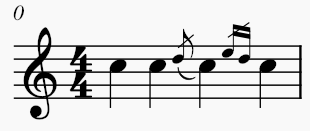

## Chordify and Grace Notes

By default, music21 includes GraceNotes when creating chords via *chordify*

In [9]:
m.chordify().show('xml')

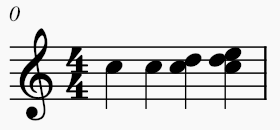

it is easy to create a Stream that removes the grace notes

In [10]:
# let’s make a copy of the measure
import copy
mCopy = copy.deepcopy(m)

Next, we will keep track of every grace note to remove:

In [11]:
graceNotes = []
for n in mCopy.recurse().notes:
    if n.duration.isGrace:
        graceNotes.append(n)

graceNotes

[<music21.note.Note D>, <music21.note.Note E>, <music21.note.Note D>]

Next remove them from their ***activeSite***

In [12]:
for grace in graceNotes:
    grace.activeSite.remove(grace)

In [13]:
mCopy.chordify().show('xml')

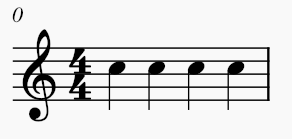

## Appogiature

Appogiature are not yet fully supported by music21 !!!